In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
dataset = pd.read_csv("../Data/loan_data.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,NaN,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
dataset.isnull().sum()

Loan_ID               0
Gender               14
Married               4
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

/tmp/ipykernel_2804/2078620680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


[]

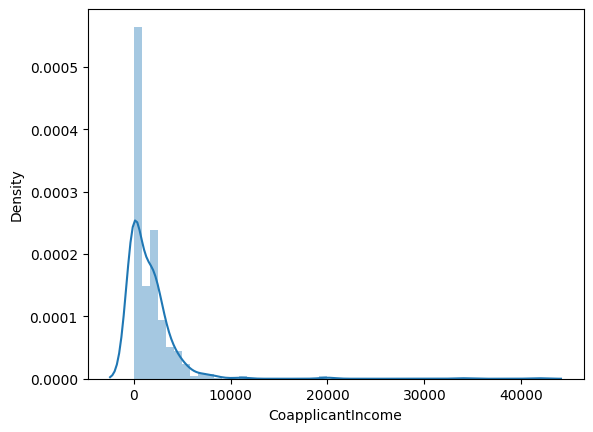

In [40]:
sns.distplot(dataset["CoapplicantIncome"])
plt.plot()

In [41]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr = q3-q1

In [42]:
min_r = q1 -(1.5*iqr)
max_r = q3 +(1.5*iqr)

In [43]:
dataset=dataset[dataset["CoapplicantIncome"]<=max_r]

In [44]:
from sklearn.preprocessing import FunctionTransformer

we are using log1p instead of log10 coz if are data is 0 at that time we would be getting it as infinity or undefined and which will hamper the dataset, it will give 1-p output.
Using different functions we find out the exact function which brings in Normal distribution 

In [45]:
# ft = FunctionTransformer(func=np.log1p)  log function transformer
ft = FunctionTransformer(func=lambda x : x**2)
ft.fit(dataset[["CoapplicantIncome"]])

,func,<function <la...x78c3ad213920>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [46]:
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]])

/tmp/ipykernel_2804/2257777331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]])


/tmp/ipykernel_2804/1965305833.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
/tmp/ipykernel_2804/1965305833.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


[]

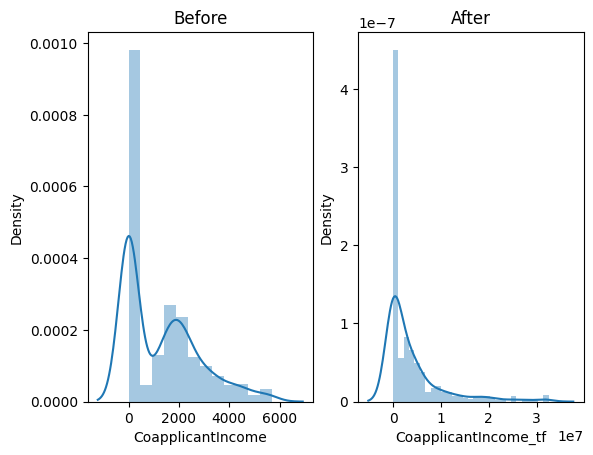

In [47]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.plot()



as we can see above that the nature of the data is itself transformed into logarithmic, if we even dont do the transformation with outliers still it brings the data into transformation, so if we feel that our outlier has important data then we can avoid it and directly do transformation. We can use any function
